# Table of Contents

### 1.import libraries
### 2.Load Datasets
### 3.Data Preprocessing
### 4.EDA
### 5.train_test_split
### 6.Model Training with XGBoost
### 7.Model Evalution
### 8.Visualize Predictions
### 9.Feature importance
### 10.Make Predictions
### 11.Save Molel

# Import Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

# Load Dataset 

In [10]:
df = pd.read_csv('Melbourne_df.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


# Data Preprocessing

In [11]:
df.columns.tolist()    # this is a numpy array so you must be convert it to a list

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'Regionname',
 'Propertycount',
 'Distance',
 'CouncilArea']

In [12]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [13]:
df = df.drop(['Method','Regionname'],axis = 'columns')
df.head()

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,Jellis,1/04/2017,3067,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,Marshall,1/04/2017,3067,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,Nelson,1/04/2017,3067,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,Barry,1/04/2017,3040,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,Nelson,1/04/2017,3042,3464,10.4,Moonee Valley City Council


In [14]:
df

,Suburb,Address,Rooms,Type,Price,SellerG,Date,Postcode,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,Jellis,1/04/2017,3067,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,Marshall,1/04/2017,3067,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,Nelson,1/04/2017,3067,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,Barry,1/04/2017,3040,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,Nelson,1/04/2017,3042,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,Raine,31/03/2018,3064,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,Raine,31/03/2018,3064,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,Raine,31/03/2018,3064,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,Barry,31/03/2018,3074,7955,15.3,Whittlesea City Council


In [15]:
enc = LabelEncoder()
df['Type'] = enc.fit_transform(df['Type'])

# Define some Features

features = ['Rooms','Type','Postcode','Distance','Propertycount','Price']
df_clean = df[features]

df_clean

,Rooms,Type,Postcode,Distance,Propertycount,Price
0,3,0,3067,3.0,4019,1490000.0
1,3,0,3067,3.0,4019,1220000.0
2,3,0,3067,3.0,4019,1420000.0
3,3,0,3040,7.5,1543,1515000.0
4,2,0,3042,10.4,3464,670000.0
...,...,...,...,...,...,...
63018,3,0,3064,20.6,5833,566000.0
63019,3,0,3064,20.6,5833,500000.0
63020,3,0,3064,20.6,5833,545000.0
63021,3,2,3074,15.3,7955,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  int64  
 4   Price          48433 non-null  float64
 5   SellerG        63023 non-null  object 
 6   Date           63023 non-null  object 
 7   Postcode       63023 non-null  int64  
 8   Propertycount  63023 non-null  int64  
 9   Distance       63023 non-null  float64
 10  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 5.3+ MB


In [17]:
df_clean.isna().sum()

Rooms                0
Type                 0
Postcode             0
Distance             0
Propertycount        0
Price            14590
dtype: int64

In [18]:
df_clean.info()

df_clean = df_clean.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Type           63023 non-null  int64  
 2   Postcode       63023 non-null  int64  
 3   Distance       63023 non-null  float64
 4   Propertycount  63023 non-null  int64  
 5   Price          48433 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 2.9 MB


In [19]:
x=df_clean.drop('Price',axis='columns')
y=df_clean.Price

y,x

(0        1490000.0
 1        1220000.0
 2        1420000.0
 3        1515000.0
 4         670000.0
            ...    
 63016     347700.0
 63017     808000.0
 63018     566000.0
 63019     500000.0
 63020     545000.0
 Name: Price, Length: 48433, dtype: float64,
        Rooms  Type  Postcode  Distance  Propertycount
 0          3     0      3067       3.0           4019
 1          3     0      3067       3.0           4019
 2          3     0      3067       3.0           4019
 3          3     0      3040       7.5           1543
 4          2     0      3042      10.4           3464
 ...      ...   ...       ...       ...            ...
 63016      2     2      3199      38.0          17055
 63017      3     0      3072       8.4          14577
 63018      3     0      3064      20.6           5833
 63019      3     0      3064      20.6           5833
 63020      3     0      3064      20.6           5833
 
 [48433 rows x 5 columns])

# EDA(Exploratory Data Analysis)

Text(0.5, 1.0, 'Features Correlation')

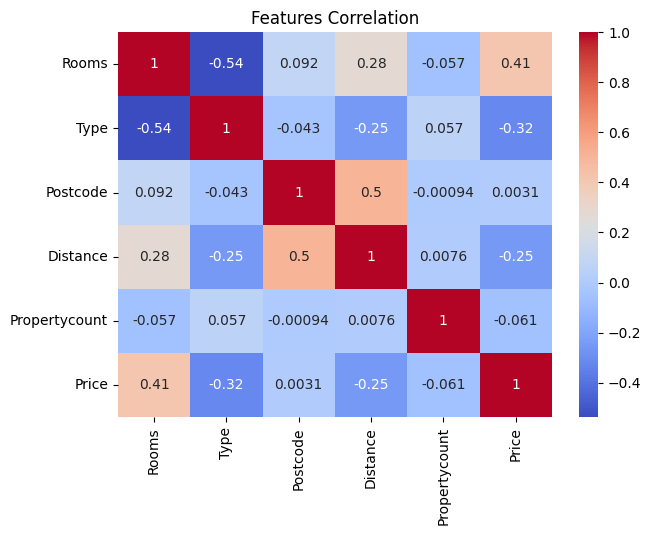

In [20]:
plt.figure(figsize=(7,5))
sns.heatmap(df_clean.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Features Correlation')

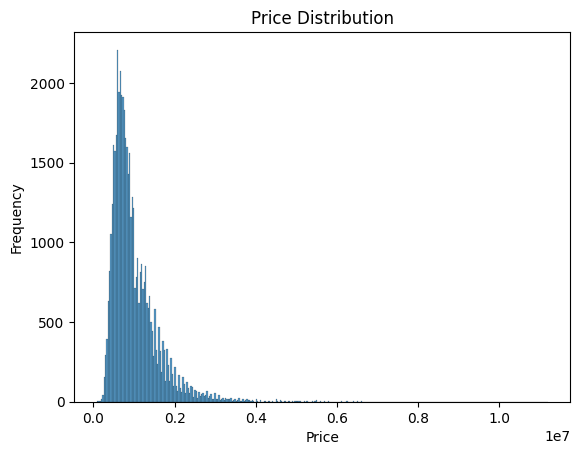

In [21]:
sns.histplot(df.Price)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Train Test Split

In [22]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
x_train.size, x_test.size

(193730, 48435)

In [24]:
# Model Training
model = XGBRegressor(n_estimators=200, 
                     learning_rate=0.1, 
                     max_depth=3,
                     subsample=0.8,
                     colsample_bytree=0.7, 
                     random_state=42)

model.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Model Evaluation

In [25]:
print(x_test.head())
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

mse,r2

       Rooms  Type  Postcode  Distance  Propertycount
13202      5     1      3104       9.7           7809
27520      3     0      3338      29.8           4718
5592       3     0      3073      12.0          21650
55598      3     1      3193      17.3           2866
38941      4     0      3064      20.6          15510


(92748310197.56757, 0.7281461713479138)

In [26]:
model.score(x_test,y_test)

0.7281461713479138

# Vizualisation Prediction

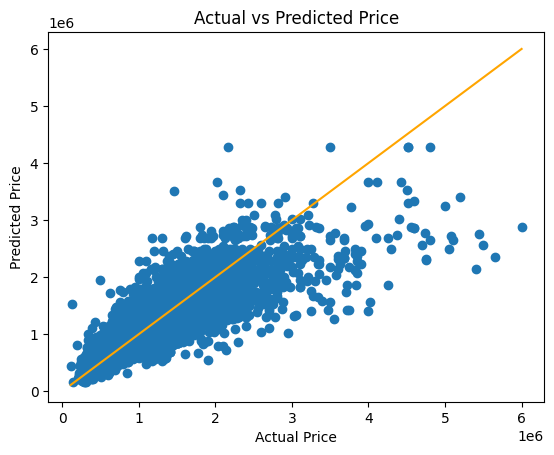

In [27]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='orange')
plt.show()

# Feature Importance

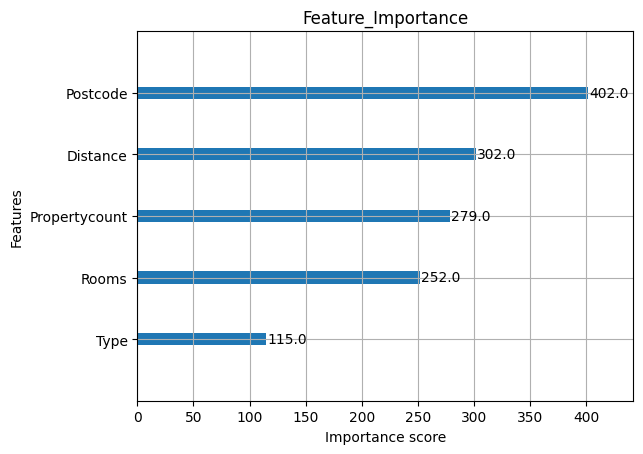

In [28]:
from xgboost import plot_importance
plot_importance(model)
plt.title('Feature_Importance')
plt.show()

# Make Prediction

In [29]:
model.predict([[4,0,3001,5.0,1500]])

array([2.1905748e+06], dtype=float32)

# Save Model

In [30]:
import joblib as jl

jl.dump(model,'xgboost_model.pkl')

['xgboost_model.pkl']